In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action= "ignore")

In [2]:
from matplotlib import style
style.use('fivethirtyeight')

#                                                  Reggression Project (2)
 
 

## Contents
1.  Introduction
2.  The Aim of Analysis
3.  General Information of the Data
4.  Arrangements of the Data Sets
5.  Filling of the Row Data 
6.  Data Exploration 
7.  Splitting the Data
8.  Feature Engineering
     * 8.1 PCA Results with only numeric variables
     * 8.2 Switching Variables to Dummies*
       * 8.2. a) PCA Results with all features with dummies 
9.  Building Models
     * 9.1 Building Model with all Variables
     * 9.2 Adding Polinomial Features
     * 9.3 Building Polinomial Regression Models
      * 9.3 a)Checking the Best Polinomial Degree
      * 9.3 b)Checking the Performance of Models within Polinomial Degree
10. Predicting the Model
11. Evaluating the Model
12. Conclusions

**1. Introduction**

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

**2. The Aim of Analysis**

This study aims to search for the elements which effects life expectancy by using correlations with regression models.

**3. General Information of the Data**

Country : Country

Year : Year 

Status : Developed or Developing status

Life expectancy : Life Expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population


Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage:  expenditureExpenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles : Measles - number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

under-five deaths : Number of under-five deaths per 1000 population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria :  Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP : Gross Domestic Product per capita (in USD)

Population : Population of the country

thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling : Number of years of Schooling(years)

**4. Data Exploration**

In [71]:
LifeExpectancyData = pd.read_csv('data/LifeExpectancyData.csv')
LifeExpectancyData.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [72]:
LifeExpectancyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [73]:
LifeExpectancyData.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

We have a lot of missing population values in  many countries. We alsa have GDP values from population for each countries as well. Therefore, I preferred to drop coloumn from data frame.

In [74]:
LifeExpectancyData.columns 

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [75]:
LifeExpectancyData.columns= ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP','Population', 'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']

In [76]:
bos_hucre_toplam = LifeExpectancyData.isnull().sum()
bos_hucre_yuzde = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()
bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])
bos_degerler = bos_degerler.sort_values('bos_toplam', ascending=False)

In [77]:
def bos_hucre(LifeExpectancyData):
    bos_hucre_toplam = LifeExpectancyData.isnull().sum()
    bos_hucre_yuzde = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()
    bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])
    bos_degerler = bos_degerler.sort_values('bos_toplam', ascending=False)
    return bos_degerler[bos_degerler['bos_toplam'] > 0]

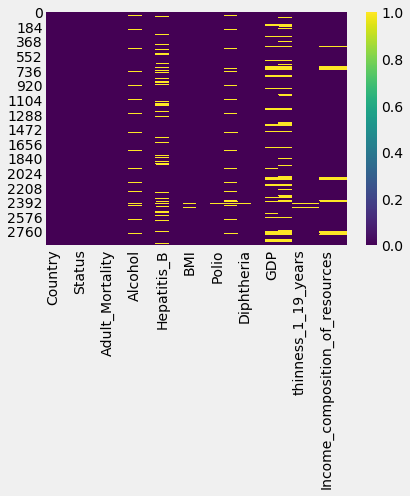

In [78]:
sns.heatmap(LifeExpectancyData.isnull(),cmap='viridis')

**4.a. Importing an Extarnel Data Frame**

***Further steps requires extra tools to compare and to group row data for cleaning and filling Null values. Therefore, I imported another data frame with neccessary columns.**

In [79]:
regions = pd.read_csv('./data/all.csv')

In [80]:
regions.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.000,34.000,nan
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.000,154.000,nan
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.000,39.000,nan
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.000,15.000,nan
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.000,61.000,nan


In [81]:
regions[['name', 'region', 'sub-region']].isnull().sum()

name          0
region        1
sub-region    1
dtype: int64

In [82]:
regions.columns

Index(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

**4.b. Merging two data frame in one, LifeExpectancyData_merged, will help us to fill in accurately.**

In [83]:
LifeExpectancyData_merged = pd.merge(LifeExpectancyData, regions[['name', 'region', 'sub-region']], left_on='Country', right_on='name')

In [84]:
bos_hucre(LifeExpectancyData_merged)

,bos_toplam,bos_yuzde
Population,556,0.197
Hepatitis_B,536,0.190
GDP,352,0.125
Total_Expenditure,204,0.072
Alcohol,187,0.066
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012


In [85]:
LifeExpectancyData_merged.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,name,region,sub-region
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100,Afghanistan,Asia,Southern Asia
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,0.100,612.697,327582.000,17.500,17.500,0.476,10.000,Afghanistan,Asia,Southern Asia
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900,Afghanistan,Asia,Southern Asia
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800,Afghanistan,Asia,Southern Asia
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500,Afghanistan,Asia,Southern Asia


**5. Cleaning of the Row Data**

There is a high number of Null values on Population column. We already have GDP values on each countries so I prefered to drop it.

In [86]:
LifeExpectancyData_merged.drop('Population', inplace=True, axis=1)

In [87]:
LifeExpectancyData_merged.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'name', 'region', 'sub-region'],
      dtype='object')

In [88]:
fill_list = (bos_hucre(LifeExpectancyData_merged)).index

In [89]:
bos_hucre(LifeExpectancyData_merged)

,bos_toplam,bos_yuzde
Hepatitis_B,536,0.190
GDP,352,0.125
Total_Expenditure,204,0.072
Alcohol,187,0.066
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012
Polio,19,0.007


**5. Filling of the Row Data**

In [90]:
df_interpolate = LifeExpectancyData_merged.copy()

for col in fill_list:
    df_interpolate[col] = df_interpolate.groupby(['Country'])[col].transform(lambda x: x.interpolate(limit_direction = 'both'))

In [91]:
bos_hucre(df_interpolate)

,bos_toplam,bos_yuzde
GDP,309,0.109
Hepatitis_B,144,0.051
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012
Alcohol,17,0.006
Total_Expenditure,16,0.006
Life_Expectancy,10,0.004


****Applying Interpolate on both direction with grouping by Country, does not help on missing values of Total_Expenditure and Alcohol  as there is no information on related countries. Thus, I used interpolte method with grouping by sub-region and Year columns.***

In [92]:
for col in fill_list:
    df_interpolate[col] = df_interpolate.groupby(['sub-region', 'Year'])[col].transform(lambda x: x.interpolate(limit_direction='both'))

In [93]:
bos_hucre(df_interpolate)

,bos_toplam,bos_yuzde


In [94]:
LifeExpectancyData_num = df_interpolate._get_numeric_data() 

**Correlations Between Variables**

In [95]:
corr_matrix = LifeExpectancyData_num.corr()
corr_list = corr_matrix.Life_Expectancy.abs().sort_values(ascending=False).index[1:]
corr_list

Index(['Schooling', 'Income_composition_of_resources', 'Adult_Mortality',
       'HIV/AIDS', 'BMI', 'Diphtheria', 'thinness_1_19_years',
       'thinness_5_9_years', 'Polio', 'GDP', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Total_Expenditure',
       'under_five_deaths', 'infant_deaths', 'Year', 'Measles'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

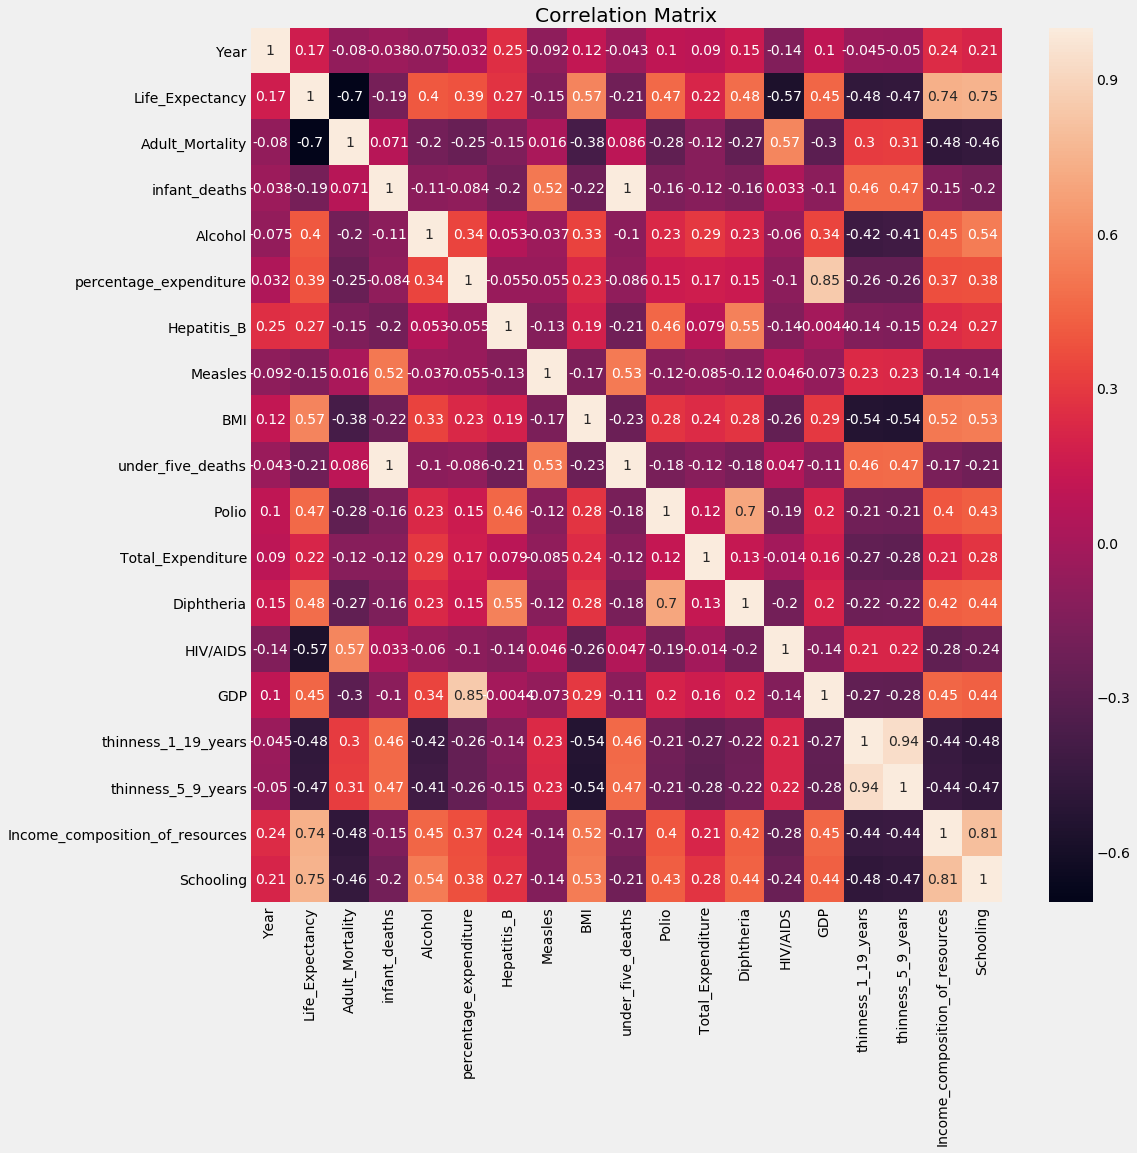

In [96]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')

Chart shows that High correlations on Life Expectancy are with 'Adult_Mortality', 'HIV/AIDS', 'thinness_5_9_years', 'thinness_1_19_years','Income_composition_of_resources', 'Schooling' variables.

fazla degisken eklemek ek hesaplamalar getireceginden toplam varyansi en az degiskenle aciklamak esastir

# 8.Feature Engineering

**8.1 PCA Results with only numeric variables**

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

***Numerik verilerle PCA DEGERLERI***

In [98]:
#Kovaryans Matriksi 

LifeExpectancyData_num = LifeExpectancyData_num.dropna()

X = StandardScaler().fit_transform(LifeExpectancyData_num)#standardize the feature matrix

pca = PCA(n_components=0.95, whiten=True)

X_pca = pca.fit_transform(X)

In [99]:
print (pca.explained_variance_ratio_)

[0.33404722 0.12688528 0.09964889 0.07131077 0.0649958  0.0542343
 0.04168898 0.03913402 0.03116406 0.02817749 0.0253805  0.02213014
 0.01802371]


In [100]:
#Show results

print('Original Number of Features', X.shape[1]) #shape[1]deki amac sadece boyutuna bakmak ve gozlem sayisini es gecmek
print('Reduced Number of Features',X_pca.shape[1] )

Original Number of Features 19
Reduced Number of Features 13


In [101]:
#Creating a scaler object
sc = StandardScaler()

#fit the scaler to the features and transform
X_std = sc.fit_transform(X)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca.shape

(2826, 13)

In [102]:
from sklearn.decomposition import PCA
from sklearn import decomposition, datasets

In [103]:
#Creating a PCA object with 13 components as a parameter
pca = decomposition.PCA(n_components=13) 
# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca.shape

(2826, 13)

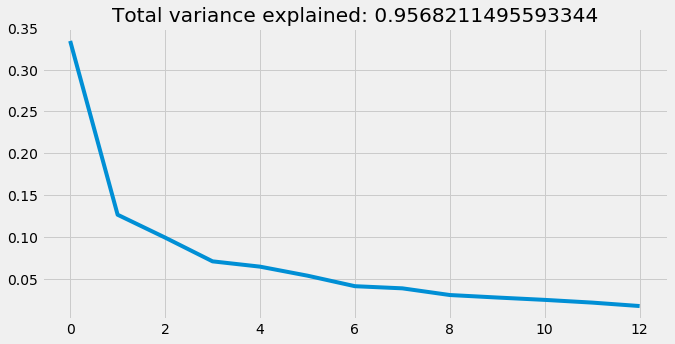

In [104]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

In [105]:
Xt = X.T
Cx = np.cov(Xt)

#print('Kovaryans matrisi :\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

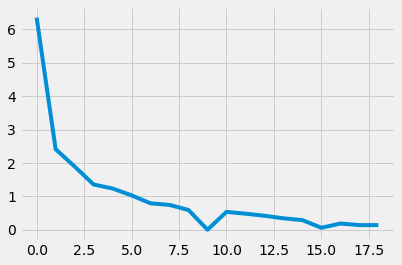

NameError: name 'Plt' is not defined

In [106]:
plt.plot(eig_val_cov)
plt.show()
Plt.title("Total Variance Explanied: {}.format(PCA)")
print(eig_val_cov)

Veri kümesindeki toplam varyans yüzdesi Elle hesaplanan bileşen.
 [0.33404722 0.12688528 0.09964889 0.07131077 0.0649958  0.0542343
 0.04168898 0.03913402 0.03116406 0.02817749 0.0253805  0.02213014
 0.01802371]


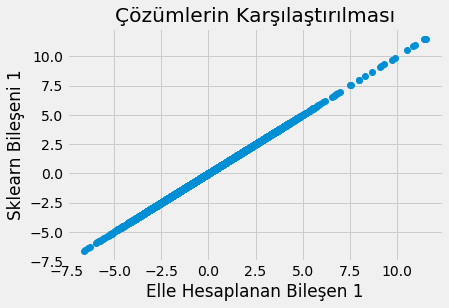

In [107]:
sklearn_pca = PCA(n_components=13)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

Y = P.T.dot(Xt)

print(
    'Veri kümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Çözümlerin Karşılaştırılması')
plt.ylabel('Sklearn Bileşeni 1')
plt.xlabel('Elle Hesaplanan Bileşen 1')
plt.show()

**8.2 Switching Variables to Dummies**

In [108]:
df_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 2825
Data columns (total 24 columns):
Country                            2826 non-null object
Year                               2826 non-null int64
Status                             2826 non-null object
Life_Expectancy                    2826 non-null float64
Adult_Mortality                    2826 non-null float64
infant_deaths                      2826 non-null int64
Alcohol                            2826 non-null float64
percentage_expenditure             2826 non-null float64
Hepatitis_B                        2826 non-null float64
Measles                            2826 non-null int64
BMI                                2826 non-null float64
under_five_deaths                  2826 non-null int64
Polio                              2826 non-null float64
Total_Expenditure                  2826 non-null float64
Diphtheria                         2826 non-null float64
HIV/AIDS                           2826 non-null

In [109]:
df_dummies = pd.get_dummies(df_interpolate)
df_dummies.head()

,Year,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,sub-region_Northern Africa,sub-region_Northern America,sub-region_Northern Europe,sub-region_Polynesia,sub-region_South-eastern Asia,sub-region_Southern Asia,sub-region_Southern Europe,sub-region_Sub-Saharan Africa,sub-region_Western Asia,sub-region_Western Europe
0,2015,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,83,...,0,0,0,0,0,1,0,0,0,0
1,2014,59.900,271.000,64,0.010,73.524,62.000,492,18.600,86,...,0,0,0,0,0,1,0,0,0,0
2,2013,59.900,268.000,66,0.010,73.219,64.000,430,18.100,89,...,0,0,0,0,0,1,0,0,0,0
3,2012,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,93,...,0,0,0,0,0,1,0,0,0,0
4,2011,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,97,...,0,0,0,0,0,1,0,0,0,0


**8.2. a) PCA Results with all features with dummies**

In [110]:
df_dummies = df_dummies.dropna()

X = StandardScaler().fit_transform(df_dummies)#standardize the feature matrix

pca = PCA(n_components=0.95, whiten=True)

X_pca = pca.fit_transform(X)

In [111]:
print('Original Number of Features', X.shape[1]) 
print('Reduced Number of Features',X_pca.shape[1])

Original Number of Features 415
Reduced Number of Features 178


In [112]:
#Creating a scaler object
sc = StandardScaler()

#fit the scaler to the features and transform
X_std = sc.fit_transform(X)

In [113]:
#Creating a PCA object with 178 components as a parameter
pca = decomposition.PCA(n_components=178) 
# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca.shape

(2826, 178)

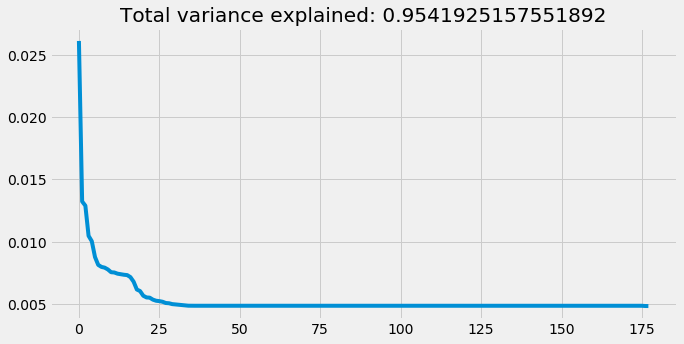

In [114]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

PCA with 178 variables can explain of 95% of total variance.

In [115]:
Xt = X.T
Cx = np.cov(Xt)

#print('Kovaryans matrisi :\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

Veri kümesindeki toplam varyans yüzdesi Elle hesaplanan bileşen.
 [0.02613468 0.01323174 0.01289297 0.01046809 0.01003585 0.0087617
 0.00813096 0.00797096 0.00791001 0.00776466 0.00754354 0.0075214
 0.00742569 0.00737765 0.0073381  0.00731026 0.00714994 0.00677972
 0.0061529  0.00602734 0.00565113 0.00551635 0.0054961  0.00533751
 0.00524913 0.00521813 0.00516728 0.00506734 0.00504749 0.00497917
 0.00495261 0.00493317 0.00489226 0.00487141 0.00485125 0.00484672
 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672
 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672
 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672
 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672
 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672
 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672
 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672
 0.00484672 0.00484672 0.00484672 0.00484672 0.00484672 0.0048467

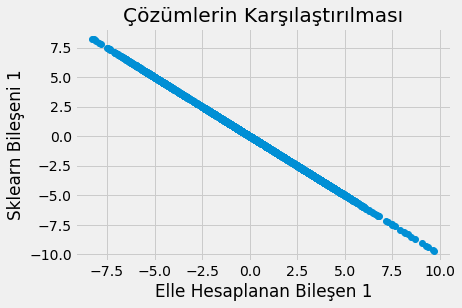

In [116]:

sklearn_pca = PCA(n_components=178)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

Y = P.T.dot(Xt)

print(
    'Veri kümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Çözümlerin Karşılaştırılması')
plt.ylabel('Sklearn Bileşeni 1')
plt.xlabel('Elle Hesaplanan Bileşen 1')
plt.show()

# 9. Building Models

 **9.1 Building Model with all Variables**

In [117]:
y_allValues = LifeExpectancyData_num['Life_Expectancy']
X_allValues = LifeExpectancyData_num[corr_list]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_allValues, y_allValues, test_size = 0.2, random_state = 101)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


We're splitting the data in two, so out of 100 rows, 80 rows will go into the training set, and 20 rows will go into the testing set.

In [119]:
X_train = sm.add_constant(X_train)

tum_degiskenli_model = sm.OLS(y_train, X_train).fit()

tum_degiskenli_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     606.6
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        23:33:22   Log-Likelihood:                -6272.3
No. Observations:                2260   AIC:                         1.258e+04
Df Residuals:                    2241   BIC:                         1.269e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             144.4721     39.109      3.694      0.000      67.778     221.166
Schooling                           0.7393      0.046     15.990      0.000       0.649       0.830
Income_composition_of_resources     8.1208      0.718     11.317      0.000       6.714       9.528
Adult_Mortality                    -0.0173      0.001    -18.582      0.000      -0.019      -0.016
HIV/AIDS                           -0.5135      0.023    -22.392      0.000      -0.558      -0.469
BMI                                 0.0402      0.005      7.366      0.000       0.029       0.051
Diphtheria                          0.0247      0.005      4.725      0.000       0.014       0.035
thinness_1_19_years                -0.0747      0.052     -1.437      0.151      -0.177       0.027
thinness_5_9_years                  0.0129      0.051      0.252      0.801      -0.088       0.114
Polio                               0.0236      0.005      4.863      0.000       0.014       0.033
GDP                              2.183e-05   1.17e-05      1.874      0.061   -1.01e-06    4.47e-05
Alcohol                             0.0592      0.027      2.231      0.026       0.007       0.111
percentage_expenditure              0.0002   7.78e-05      2.892      0.004    7.24e-05       0.000
Hepatitis_B                        -0.0016      0.004     -0.451      0.652      -0.009       0.005
Total_Expenditure                   0.0159      0.035      0.456      0.649      -0.053       0.084
under_five_deaths                  -0.0669      0.006    -10.546      0.000      -0.079      -0.054
infant_deaths                       0.0897      0.009     10.431      0.000       0.073       0.107
Year                               -0.0454      0.020     -2.321      0.020      -0.084      -0.007
Measles                         -1.679e-05   9.76e-06     -1.721      0.085   -3.59e-05    2.35e-06
==============================================================================
Omnibus:                      149.293   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.460
Skew:                           0.008   Prob(JB):                    5.83e-152
Kurtosis:                       5.720   Cond. No.                     7.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**9.2 Adding Polinomial Features**

In [120]:
df = LifeExpectancyData_num.drop(["Life_Expectancy", "Year"], axis=1)

In [121]:
df.head()

,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,17.200,17.300,0.479,10.100
1,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,17.500,17.500,0.476,10.000
2,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,17.700,17.700,0.470,9.900
3,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,17.900,18.000,0.463,9.800
4,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,18.200,18.200,0.454,9.500


In [122]:
df.shape

(2826, 17)

**9.3 Building Polinomial Regression Models**

**9.3 a)Checking the Best Polinomial Degree**

In [141]:
from sklearn.preprocessing import PolynomialFeatures #once tanimlayip fit edip degiskene uygulayacagiz

#4. dereceden Polinomla Kontrol

poly = PolynomialFeatures(4)
poly_array = poly.fit_transform(df)
poly_array.shape

(2826, 5985)

In [142]:
df_poly4 = pd.DataFrame(poly_array, columns= poly.get_feature_names())

In [143]:
df_poly4.head()

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x14^2 x16^2,x14 x15^3,x14 x15^2 x16,x14 x15 x16^2,x14 x16^3,x15^4,x15^3 x16,x15^2 x16^2,x15 x16^3,x16^4
0,1.000,263.000,62.000,0.010,71.280,65.000,1154.000,19.100,83.000,6.000,...,30530.573,1.901,40.090,845.326,17824.207,0.053,1.110,23.405,493.514,10406.040
1,1.000,271.000,64.000,0.010,73.524,62.000,492.000,18.600,86.000,58.000,...,30625.000,1.887,39.651,833.000,17500.000,0.051,1.079,22.658,476.000,10000.000
2,1.000,268.000,66.000,0.010,73.219,64.000,430.000,18.100,89.000,62.000,...,30705.553,1.838,38.708,815.345,17174.292,0.049,1.028,21.650,456.041,9605.960
3,1.000,272.000,69.000,0.010,78.184,67.000,2787.000,17.600,93.000,67.000,...,31116.960,1.787,37.815,800.397,16941.456,0.046,0.973,20.588,435.772,9223.682
4,1.000,275.000,71.000,0.010,7.097,68.000,3013.000,17.200,97.000,68.000,...,29894.410,1.703,35.637,745.718,15604.225,0.042,0.889,18.602,389.248,8145.062


In [144]:
y = LifeExpectancyData_num['Life_Expectancy']
X = df_poly4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

poly_model_4 = sm.OLS(y_train, X_train).fit()

poly_model_4.summary()

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     23.31
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        23:43:18   Log-Likelihood:                -5503.0
No. Observations:                2260   AIC:                         1.242e+04
Df Residuals:                    1553   BIC:                         1.647e+04
Df Model:                         706                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
1                3.272e-10   2.93e-11     11.175      0.000     2.7e-10    3.85e-10
x0               1.049e-08   2.53e-10     41.515      0.000    9.99e-09     1.1e-08
x1               2.862e-08   4.87e-09      5.879      0.000    1.91e-08    3.82e-08
x2               4.228e-10   1.81e-11     23.337      0.000    3.87e-10    4.58e-10
x3               1.442e-09   2.04e-10      7.063      0.000    1.04e-09    1.84e-09
x4               6.607e-09   1.68e-10     39.406      0.000    6.28e-09    6.94e-09
x5               3.572e-09   6.02e-10      5.929      0.000    2.39e-09    4.75e-09
x6               4.684e-09   1.19e-10     39.430      0.000    4.45e-09    4.92e-09
x7               1.272e-09   6.49e-11     19.601      0.000    1.14e-09     1.4e-09
x8               8.637e-09   1.82e-10     47.349      0.000    8.28e-09    8.99e-09
x9               8.392e-10   1.98e-11     42.320      0.000       8e-10    8.78e-10
x10              7.887e-09   1.74e-10     45.223      0.000    7.55e-09    8.23e-09
x11             -1.796e-10   2.01e-10     -0.895      0.371   -5.73e-10    2.14e-10
x12              2.914e-08   1.28e-09     22.787      0.000    2.66e-08    3.16e-08
x13              4.624e-10   4.78e-11      9.674      0.000    3.69e-10    5.56e-10
x14              1.032e-09   1.16e-10      8.890      0.000    8.04e-10    1.26e-09
x15              6.403e-11    1.7e-11      3.770      0.000    3.07e-11    9.73e-11
x16              1.775e-09   4.03e-11     43.999      0.000     1.7e-09    1.85e-09
x0^2             6.695e-07   2.44e-08     27.414      0.000    6.22e-07    7.17e-07
x0 x1            4.791e-09    3.9e-09      1.229      0.219   -2.86e-09    1.24e-08
x0 x2            1.486e-08   1.59e-09      9.359      0.000    1.17e-08     1.8e-08
x0 x3            9.809e-08   1.38e-08      7.089      0.000     7.1e-08    1.25e-07
x0 x4            2.932e-07   7.26e-09     40.399      0.000    2.79e-07    3.07e-07
x0 x5            2.159e-07   2.02e-08     10.684      0.000    1.76e-07    2.56e-07
x0 x6             2.79e-07    9.2e-09     30.319      0.000    2.61e-07    2.97e-07
x0 x7            4.429e-09   5.99e-09      0.739      0.460   -7.32e-09    1.62e-08
x0 x8            3.629e-07   8.54e-09     42.484      0.000    3.46e-07     3.8e-07
x0 x9            4.034e-08   1.34e-09     30.052      0.000    3.77e-08     4.3e-08
x0 x10           3.484e-07   7.91e-09     44.019      0.000    3.33e-07    3.64e-07
x0 x11          -2.786e-09   1.12e-09     -2.493      0.013   -4.98e-09   -5.94e-10
x0 x12           1.002e-06   8.14e-08     12.308      0.000    8.42e-07    1.16e-06
x0 x13           3.181e-08   1.79e-09     17.797      0.000    2.83e-08    3.53e-08
x0 x14           3.137e-08   1.78e-09     17.594      0.000    2.79e-08    3.49e-08
x0 x15           4.969e-09    1.5e-10     33.104      0.000

In [146]:
#3. dereceden Polinomla Kontrol

poly = PolynomialFeatures(3)
poly_array = poly.fit_transform(df)
poly_array.shape

(2826, 1140)

In [147]:
df_poly3 = pd.DataFrame(poly_array, columns= poly.get_feature_names())

In [148]:
y = LifeExpectancyData_num['Life_Expectancy']
X = df_poly3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

poly_model_3 = sm.OLS(y_train, X_train).fit()

poly_model_3.summary()

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     61.09
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        23:44:23   Log-Likelihood:                -4299.1
No. Observations:                2260   AIC:                         1.017e+04
Df Residuals:                    1472   BIC:                         1.468e+04
Df Model:                         787                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
1               0.0005   2.02e-05     23.298      0.000       0.000       0.001
x0              0.0987      0.052      1.883      0.060      -0.004       0.202
x1             -0.1291      0.105     -1.235      0.217      -0.334       0.076
x2             -0.0104      0.010     -1.029      0.304      -0.030       0.009
x3             -0.0012      0.031     -0.040      0.968      -0.061       0.059
x4             -0.2532      0.119     -2.131      0.033      -0.486      -0.020
x5              0.0011      0.006      0.176      0.860      -0.011       0.013
x6              0.3477      0.183      1.895      0.058      -0.012       0.708
x7             -0.2256      0.159     -1.417      0.157      -0.538       0.087
x8             -0.0040      0.060     -0.067      0.946      -0.121       0.113
x9              0.0234      0.022      1.038      0.299      -0.021       0.067
x10            -0.0413      0.056     -0.737      0.461      -0.151       0.069
x11            -0.0551      0.020     -2.731      0.006      -0.095      -0.016
x12             0.0173      0.004      4.188      0.000       0.009       0.025
x13             0.0100      0.023      0.436      0.663      -0.035       0.055
x14             0.0115      0.024      0.485      0.628      -0.035       0.058
x15             0.0052      0.003      1.914      0.056      -0.000       0.011
x16             0.0407      0.032      1.283      0.200      -0.022       0.103
x0^2            0.0003      0.000      1.825      0.068   -2.26e-05       0.001
x0 x1           0.0074      0.005      1.446      0.148      -0.003       0.017
x0 x2           0.0106      0.004      2.494      0.013       0.002       0.019
x0 x3        4.177e-05    6.5e-05      0.643      0.520   -8.57e-05       0.000
x0 x4           0.0015      0.001      2.694      0.007       0.000       0.003
x0 x5       -5.158e-06    8.7e-06     -0.593      0.553   -2.22e-05    1.19e-05
x0 x6           0.0001      0.001      0.123      0.902      -0.002       0.002
x0 x7          -0.0056      0.003     -1.682      0.093      -0.012       0.001
x0 x8          -0.0016      0.001     -1.410      0.159      -0.004       0.001
x0 x9           0.0056      0.005      1.172      0.241      -0.004       0.015
x0 x10         -0.0024      0.001     -2.019      0.044      -0.005   -6.92e-05
x0 x11         -0.0188      0.005     -3.613      0.000      -0.029      -0.009
x0 x12      -2.336e-05   7.35e-06     -3.179      0.002   -3.78e-05   -8.94e-06
x0 x13          0.0799      0.056      1.421      0.156      -0.030       0.190
x0 x14         -0.0814      0.056     -1.453      0.147      -0.191       0.029
x0 x15         -0.0717      0.103     -0.696      0.487      -0.274       0.130
x0 x16          0.0109      0.006      1.818      0.069      -0.001       0.023
x1^2            0.1469      0.074      1.97

In [135]:
#2. dereceden Polinomla Kontrol

poly = PolynomialFeatures(2)
poly_array = poly.fit_transform(df)
poly_array.shape

(2826, 171)

In [136]:
df_poly2 = pd.DataFrame(poly_array, columns= poly.get_feature_names())

In [137]:
y = LifeExpectancyData_num['Life_Expectancy']
X = df_poly2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

poly_model_2 = sm.OLS(y_train, X_train).fit()

poly_model_2.summary()

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     182.4
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        23:42:41   Log-Likelihood:                -5150.9
No. Observations:                2260   AIC:                         1.064e+04
Df Residuals:                    2089   BIC:                         1.162e+04
Df Model:                         170                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             50.2602      1.927     26.085      0.000      46.482      54.039
x0             0.0651      0.005     14.377      0.000       0.056       0.074
x1             0.4788      0.106      4.534      0.000       0.272       0.686
x2             0.2779      0.172      1.615      0.106      -0.060       0.615
x3             0.0040      0.001      2.746      0.006       0.001       0.007
x4             0.0397      0.019      2.111      0.035       0.003       0.077
x5         -7.945e-05      0.000     -0.749      0.454      -0.000       0.000
x6             0.2471      0.033      7.457      0.000       0.182       0.312
x7            -0.3321      0.071     -4.681      0.000      -0.471      -0.193
x8            -0.0269      0.027     -0.992      0.321      -0.080       0.026
x9             0.3526      0.222      1.586      0.113      -0.083       0.789
x10           -0.0130      0.028     -0.459      0.646      -0.068       0.042
x11           -1.4783      0.149     -9.931      0.000      -1.770      -1.186
x12            0.0002      0.000      1.117      0.264      -0.000       0.001
x13           -0.2774      0.491     -0.565      0.572      -1.240       0.685
x14           -0.0464      0.481     -0.096      0.923      -0.989       0.896
x15           -7.5388      3.941     -1.913      0.056     -15.268       0.191
x16            0.3674      0.244      1.505      0.132      -0.111       0.846
x0^2          -0.0001   6.07e-06    -23.765      0.000      -0.000      -0.000
x0 x1         -0.0004   7.74e-05     -4.571      0.000      -0.001      -0.000
x0 x2         -0.0002      0.000     -0.825      0.409      -0.001       0.000
x0 x3      -1.674e-06   1.53e-06     -1.093      0.275   -4.68e-06    1.33e-06
x0 x4      -5.472e-05   2.94e-05     -1.862      0.063      -0.000    2.92e-06
x0 x5       -1.02e-09   9.18e-08     -0.011      0.991   -1.81e-07    1.79e-07
x0 x6         -0.0002   5.17e-05     -3.727      0.000      -0.000   -9.13e-05
x0 x7          0.0003   5.69e-05      4.713      0.000       0.000       0.000
x0 x8      -4.142e-05   3.09e-05     -1.342      0.180      -0.000    1.91e-05
x0 x9          0.0003      0.000      0.931      0.352      -0.000       0.001
x0 x10      4.618e-05    3.4e-05      1.359      0.174   -2.04e-05       0.000
x0 x11         0.0025      0.000     20.954      0.000       0.002       0.003
x0 x12      4.716e-08   1.78e-07      0.265      0.791   -3.01e-07    3.96e-07
x0 x13         0.0015      0.001      2.509      0.012       0.000       0.003
x0 x14        -0.0017      0.001     -2.766      0.006      -0.003      -0.000
x0 x15        -0.0113      0.007     -1.701      0.089      -0.024       0.002
x0 x16        -0.0019      0.000     -4.714      0.000      -0.003      -0.001
x1^2           0.0007      0.000      2.056      0.040    3.12e-05       0.001
x1

**9.3 b)Checking the Performance of Models within Polinomial Degree**

In [152]:
#Getting P Values under 0.05 from the 3rd polinomial degree

pDegeri = poly_model_3.pvalues
anlamli_degerler = list(pDegeri[pDegeri<= 0.05].index)


In [153]:
anlamli_degerler= anlamli_degerler[1:]

In [154]:
len(anlamli_degerler)

159

In [156]:
MSE_list=[]
R_list=[]
degisken_sayisi=[]
MAE_list=[]
RMSE_list=[]
MAPE_list=[]
R_train_list=[]
MSE_train_list=[]



for degisken in range(len(anlamli_degerler)):
    Feature_list= anlamli_degerler[0:len(anlamli_degerler)-degisken]
    X_poly=df_poly3[Feature_list]
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)
    model_poly_3 = LinearRegression()
    results = model_poly_3.fit(X_train, y_train)
    y_pred  = model_poly_3.predict(X_test)
    y_pred_train = model_poly_3.predict(X_train)
    
    MSE_list.append(mse(y_test, y_pred))
    MSE_train_list.append(mse(y_train, y_pred_train))
    
    R_list.append(model_poly_3.score(X_test, y_test))
    
    R_train_list.append(model_poly_3.score(X_train, y_train))
    
     
    degisken_sayisi.append(len(Feature_list))
    
    MAE_list.append(mean_absolute_error(y_test, y_pred))
    
    RMSE_list.append(rmse(y_test, y_pred))
    
    MAPE_list.append(np.mean(np.abs((y_test-y_pred) / y_test)) * 100)

In [165]:
model_ortalamaları = list(zip(degisken_sayisi, R_list,R_train_list,MSE_list,MSE_train_list,MAE_list,RMSE_list,MAPE_list))
poly_Ortalamalar = pd.DataFrame(model_ortalamaları, columns= ['degisken_sayisi','R_list','R_train_list',
                                                            'MSE_list','MSE_train_list','MAE_list', 'RMSE_list', 'MAPE_list'])
poly_Ortalamalar.iloc[:70]

,degisken_sayisi,R_list,R_train_list,MSE_list,MSE_train_list,MAE_list,RMSE_list,MAPE_list
0,159,0.892,0.929,10.116,6.266,2.100,3.181,3.251
1,158,0.892,0.929,10.059,6.270,2.094,3.172,3.242
2,157,0.893,0.929,9.987,6.271,2.090,3.160,3.236
3,156,0.893,0.929,9.969,6.271,2.088,3.157,3.232
4,155,0.903,0.928,9.020,6.362,2.063,3.003,3.170
5,154,0.901,0.927,9.274,6.383,2.078,3.045,3.201
6,153,0.901,0.927,9.201,6.406,2.075,3.033,3.197
7,152,0.901,0.927,9.210,6.406,2.076,3.035,3.198
8,151,0.898,0.927,9.505,6.416,2.087,3.083,3.224
9,150,0.898,0.927,9.538,6.447,2.077,3.088,3.210


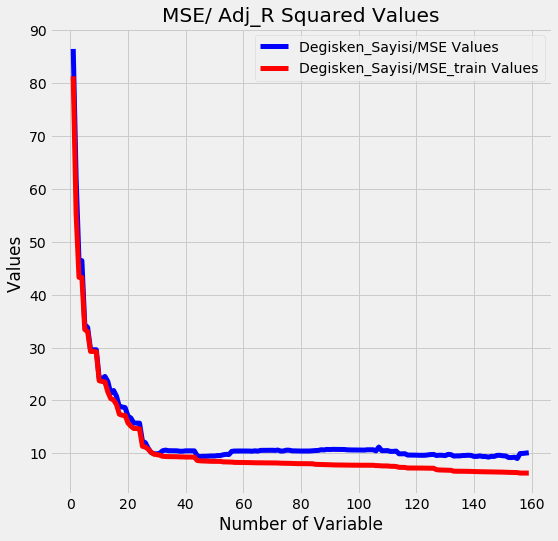

In [159]:
plt.figure(1, figsize = (8,8))
plt.plot(degisken_sayisi,MSE_list,label = 'Degisken_Sayisi/MSE Values', color='blue', linewidth=5)
plt.plot(degisken_sayisi,MSE_train_list,label = 'Degisken_Sayisi/MSE_train Values', color='red', linewidth=5)

plt.xlabel('Number of Variable')
plt.ylabel('Values ')
plt.title('MSE/ Adj_R Squared Values')
plt.legend()
plt.show()

In [ ]:
45 degiskenliden snr bozuluyor. 

**Visualization the four category based models**

ValueError: num must be 1 <= num <= 12, not 13

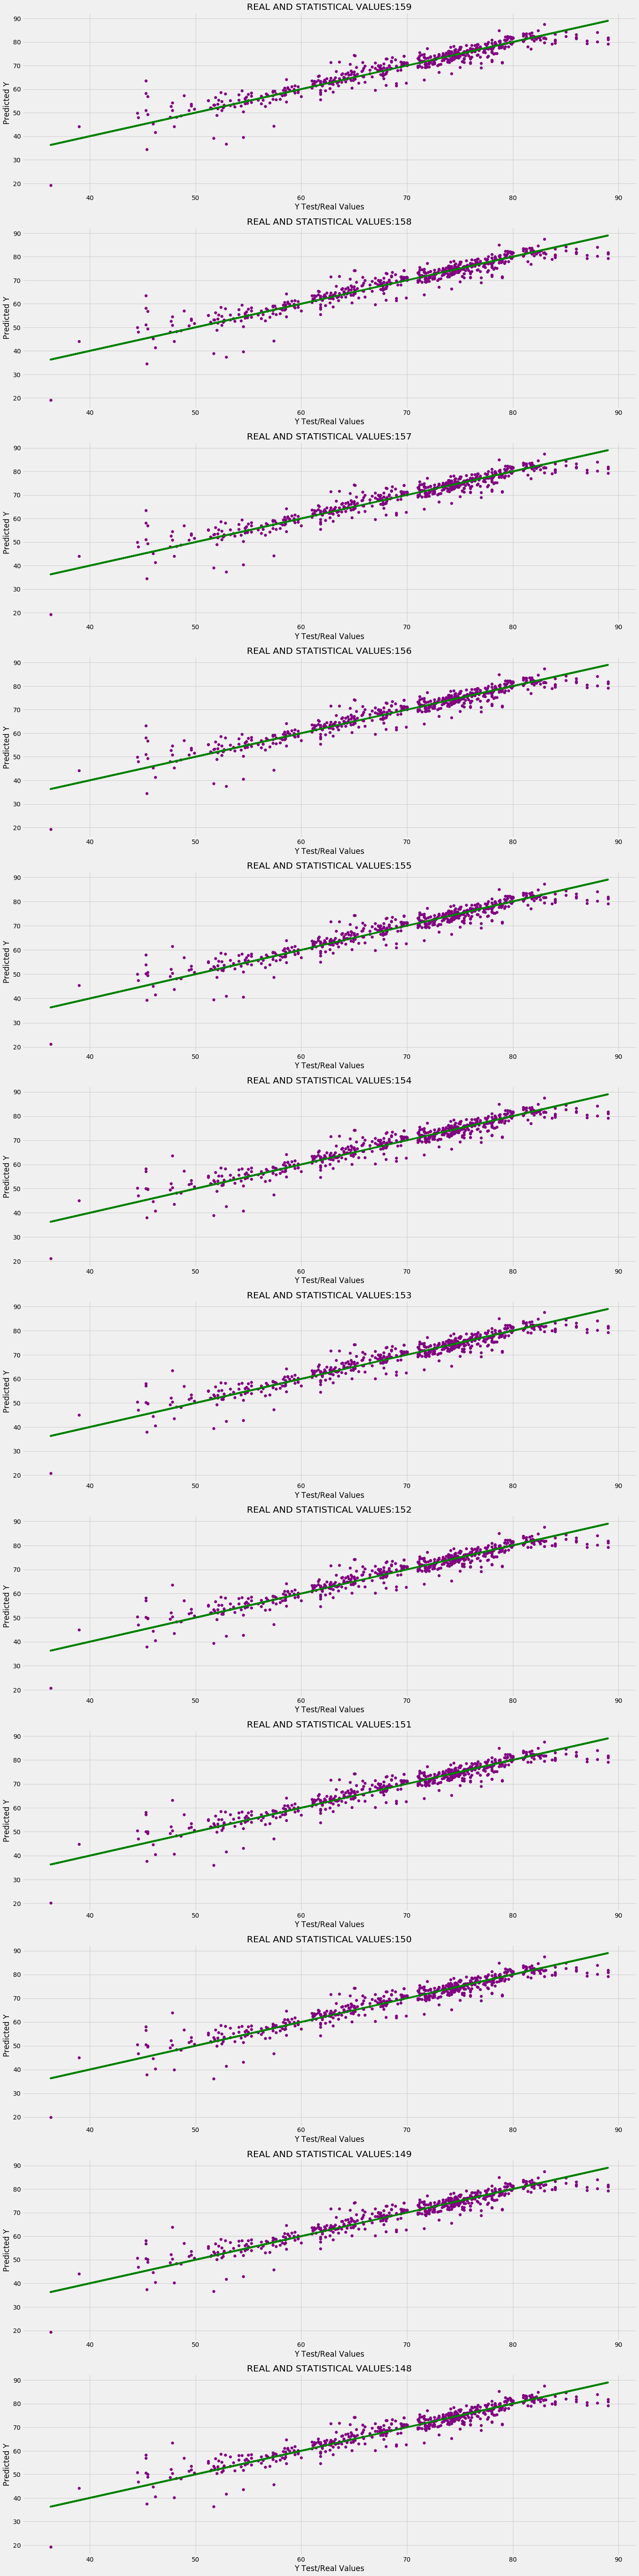

In [161]:
y_sklearn = LifeExpectancyData_num['Life_Expectancy'] 

plt.figure(figsize=(20,80))

for degisken in range(len(anlamli_degerler)):
    
    Feature_list= anlamli_degerler[0:len(anlamli_degerler)-degisken]
    X_sklearn=df_poly3[Feature_list]
    X_train, X_test, y_train, y_test = train_test_split(X_sklearn, y_sklearn, test_size = 0.2, random_state = 0)
    model_sklearn = LinearRegression()
    results = model_sklearn.fit(X_train, y_train)
    y_pred = model_sklearn.predict(X_test)
    
    
    plt.subplot(12, 1, degisken+1)
    plt.scatter(y_test,y_pred, color="purple" )
    plt.plot(y_test, y_test, color="green")
    plt.xlabel("Y Test/Real Values")
    plt.ylabel("Predicted Y")
    plt.title("REAL AND STATISTICAL VALUES:{}".format(len(Feature_list)))
    plt.tight_layout()#overlapped engelliyor
plt.show()

 We will contiune with 45 variables model  

In [47]:
y = LifeExpectancyData_num['Life_Expectancy']
X = LifeExpectancyData_num[['Schooling', 'Income_composition_of_resources', 'Adult_Mortality', 'HIV/AIDS', 'BMI',
                           'Diphtheria', 'Polio', 'Alcohol', 'percentage_expenditure', 'under_five_deaths', 'infant_deaths']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


In [49]:
anlamli_11degiskenli_model = LinearRegression()

results = anlamli_11degiskenli_model.fit(X_train, y_train)
y_pred = anlamli_11degiskenli_model.predict(X_test)#tahmini LIfe Expectancy degerleri

In [50]:
cdf = pd.DataFrame(anlamli_11degiskenli_model.coef_, X.columns,columns=['Coeff'])
cdf

,Coeff
Schooling,0.711
Income_composition_of_resources,8.550
Adult_Mortality,-0.017
HIV/AIDS,-0.556
BMI,0.046
Diphtheria,0.022
Polio,0.022
Alcohol,0.076
percentage_expenditure,0.000
under_five_deaths,-0.065


Errors on this model has a normal distrubution which shows that model is the correct choice

We will use some Variance Analysis in Regression models in order to determine whether regression models are accurate or misleading. Following a flawed model is a bad idea, so it is important that we can quantify how accurate our model is.

There are two critical characteristics of estimators to be considered: the bias and the variance. The bias is the difference between the true population parameter and the expected estimator.
It measures the accuracy of the estimates. Variance, on the other hand, measures the spread, or uncertainty, in these estimates. 

So, setting λ to 0 is the same as using the OLS, while the larger its value, the stronger is the coefficients' size penalized
as λ becomes larger, the variance decreases, and the bias increases
A more traditional approach would be to choose λ such that some information criterion,Akaike or Bayesian(AIC or BIC), is the smallest. A more machine learning-like approach is to perform cross-validation and select the value of λ that minimizes the cross-validated sum of squared residuals

# Ridge

n Ridge Regression, the OLS loss function is augmented in such a way that we not only minimize the sum of squared residuals but also penalize the size of parameter estimates, in order to shrink them towards zero

In [52]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=10**3) 
ridgeregr.fit(X_train, y_train)

y_train_ridge_preds = ridgeregr.predict(X_train)
y_Ridge_preds = ridgeregr.predict(X_test)

In [53]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_Ridge_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_Ridge_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_Ridge_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_Ridge_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.8119355585894875
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.8304457404214264
Mean Absolute Error (MAE)         : 2.963592700852012
Mean Squared Error (MSE)          : 15.812520738727288
Root Mean Squared Error (RMSE)    : 3.976496037811089
Mean Absolute Percentage Error  (MAPE) : 4.542886836831327


In [54]:
ridgeregr = Ridge(alpha=10**5) #Ridge(alpha=0.5, normalize=True)
ridgeregr.fit(X_train, y_train)

y_train_ridge_preds = ridgeregr.predict(X_train)
y_Ridge_preds = ridgeregr.predict(X_test)

In [55]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_Ridge_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_Ridge_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_Ridge_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_Ridge_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.7286064815740525
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.756595046726806
Mean Absolute Error (MAE)         : 3.4603344184059037
Mean Squared Error (MSE)          : 22.699788734931325
Root Mean Squared Error (RMSE)    : 4.7644295288031415
Mean Absolute Percentage Error  (MAPE) : 5.26408075093025


In [56]:
ridgeregr = Ridge(alpha=10**10) 
ridgeregr.fit(X_train, y_train)

y_train_ridge_preds = ridgeregr.predict(X_train)
y_Ridge_preds = ridgeregr.predict(X_test)

In [57]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_Ridge_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_Ridge_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_Ridge_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_Ridge_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.10965080919536763
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.11854042666767861
Mean Absolute Error (MAE)         : 7.361995485372789
Mean Squared Error (MSE)          : 82.20435050296065
Root Mean Squared Error (RMSE)    : 9.066661486068654
Mean Absolute Percentage Error  (MAPE) : 11.610659073001242


# Lasso 

In [58]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**3) 
lassoregr.fit(X_train, y_train)

y_train_Lasso_preds = lassoregr.predict(X_train)
y_Lasso_preds = lassoregr.predict(X_test)

In [59]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_Lasso_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_Lasso_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_Lasso_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_Lasso_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.10965080919536763
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.11854042666767861
Mean Absolute Error (MAE)         : 7.111204757315391
Mean Squared Error (MSE)          : 78.28739290290311
Root Mean Squared Error (RMSE)    : 8.84801632587232
Mean Absolute Percentage Error  (MAPE) : 11.23153926965745


In [60]:
lassoregr = Lasso(alpha=10**5) 
lassoregr.fit(X_train, y_train)

y_train_Lasso_preds = lassoregr.predict(X_train)
y_Lasso_preds = lassoregr.predict(X_test)

In [61]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_Lasso_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_Lasso_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_Lasso_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_Lasso_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.10965080919536763
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.11854042666767861
Mean Absolute Error (MAE)         : 7.906212670815223
Mean Squared Error (MSE)          : 93.2881718465824
Root Mean Squared Error (RMSE)    : 9.658580218985728
Mean Absolute Percentage Error  (MAPE) : 12.381782732012637


In [62]:
lassoregr = Lasso(alpha=10**10) 
lassoregr.fit(X_train, y_train)

y_train_Lasso_preds = lassoregr.predict(X_train)
y_Lasso_preds = lassoregr.predict(X_test)

In [63]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_Lasso_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_Lasso_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_Lasso_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_Lasso_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.10965080919536763
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.11854042666767861
Mean Absolute Error (MAE)         : 7.906212670815223
Mean Squared Error (MSE)          : 93.2881718465824
Root Mean Squared Error (RMSE)    : 9.658580218985728
Mean Absolute Percentage Error  (MAPE) : 12.381782732012637


# ElasticNet 

In [64]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**3, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

y_train_Elastic_preds = elasticregr.predict(X_train)
y_test_elastic_preds = elasticregr.predict(X_test)

In [65]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_test_elastic_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_test_elastic_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_test_elastic_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_elastic_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.10965080919536763
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.11854042666767861
Mean Absolute Error (MAE)         : 6.2521275251532495
Mean Squared Error (MSE)          : 60.43127141645353
Root Mean Squared Error (RMSE)    : 7.773755296923973
Mean Absolute Percentage Error  (MAPE) : 9.827550612447387


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

In [67]:
skorer = make_scorer(mean_absolute_error)

In [68]:
lrm = LinearRegression() #once modeli belirtti
lrm_cv = cross_val_score(estimator=lrm, X=X, y=y,cv=10, scoring=skorer)#estimater lrm girildi X ve y ayrilmadan modele konuldu
#skoring degerine istedigimiz yazabiliyoruz such as rkare,vs 
#https://scikit-learn.org/stable/modules/model_evaluation.html#
print(lrm_cv)
print(lrm_cv.mean())

[3.00224499 3.51747703 2.58092144 3.40845248 2.98186019 3.0285622
 3.0116461  3.01460213 2.91967429 2.6179173 ]
3.0083358146362817


In [69]:
alphas = [- 100, -10, -1, 
          0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000] 

In [70]:
ridge_mean_list = []
for alpha in alphas:
    ridgeregr = Ridge(alpha=alpha)
    ridge_cv = cross_val_score(estimator=ridgeregr, X=X, y=y,cv=10, scoring=skorer)
    ridge_mean_list.append(ridge_cv.mean())
print(ridge_mean_list)

[3.2243126564077556, 3.008308853409134, 3.007804136408462, 3.008335814636369, 3.0089442336009347, 3.0159067335823364, 3.0656718735925543, 3.103049880417701, 3.1897598100318065, 3.5973946276943436, 3.976942550922247, 4.711426101531025]


In [71]:
lasso_mean_list = []
lassoregr = Lasso() 
for alpha in alphas:
    lassoregr = Lasso(alpha=alpha)
    lasso_cv = cross_val_score(estimator=lassoregr, X=X, y=y,cv=10, scoring=skorer)
    lasso_mean_list.append(lasso_cv.mean())
print(lasso_mean_list)

[499.53690226662394, 50.882150919303584, 5.384154861802729, 3.000586671009798, 3.1086611535544835, 3.9684194810836395, 4.7788498358383205, 7.082975793523889, 7.7276300028357285, 7.7276300028357285, 7.7276300028357285, 7.7276300028357285]


In [72]:
from sklearn.linear_model import Lasso
elasticnet_mean_list = []
for alpha in alphas:
    elasticregr = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elasticnet_cv = cross_val_score(estimator=elasticregr, X=X, y=y,cv=10, scoring=skorer)
    elasticnet_mean_list.append(elasticnet_cv.mean())
print(elasticnet_mean_list)

[193.4143621748023, 4.837771620010272e+78, 3.178856407869324, 3.000586671009798, 3.1023757315468146, 3.748575340601112, 4.605259098652568, 6.235336808881146, 7.420123146711973, 7.7276300028357285, 7.7276300028357285, 7.7276300028357285]


In [73]:
model_ortalamaları = list(zip(alphas, ridge_mean_list, lasso_mean_list, elasticnet_mean_list))

In [74]:
df = pd.DataFrame(model_ortalamaları, columns=['alpha', 'Ridge_MSA', 'Lasso_MSA', 
                                               'ElasticNet_MSA'])
df

,alpha,Ridge_MSA,Lasso_MSA,ElasticNet_MSA
0,-100,3.224,499.537,193.414
1,-10,3.008,50.882,48377716200102723881471920235645665827747193453...
2,-1,3.008,5.384,3.179
3,0,3.008,3.001,3.001
4,1,3.009,3.109,3.102
5,10,3.016,3.968,3.749
6,100,3.066,4.779,4.605
7,1000,3.103,7.083,6.235
8,10000,3.190,7.728,7.420
9,100000,3.597,7.728,7.728


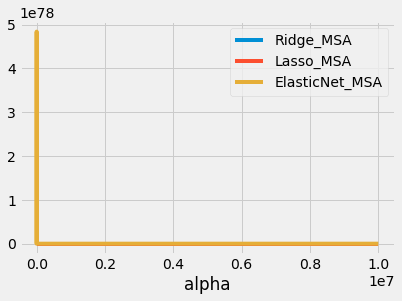

In [75]:
df.plot('alpha', ['Ridge_MSA', 'Lasso_MSA', 'ElasticNet_MSA'])
plt.show()

In [ ]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(9,6), dpi = 100)

Life_Expectancy_BMI = X.BMI * 0.1064
Life_Expectancy_Schooling = X.BMI * 3.4765
Life_Expectancy_Income_composition_of_resources = X.BMI * 21.8546
Life_Expectancy_Adult_Mortality = X.BMI * 0.0555
Life_Expectancy_HIVAIDS = X.BMI * (-0.8977)


plt.plot(X.BMI, Life_Expectancy_BMI)
plt.plot(X.BMI, Life_Expectancy_Schooling)
plt.plot(X.BMI, Life_Expectancy_Income_composition_of_resources)
plt.plot(X.BMI, Life_Expectancy_Adult_Mortality)
plt.plot(X.BMI, Life_Expectancy_HIVAIDS)

plt.legend(["Life Expectancy & BMI", "Life Expectancy & Schooling", "Life Expectancy & Income_composition_of_resources", "Life Expectancy & Adult_Mortality", "Life Expectancy & HIVAIDS"])
plt.xlabel("BMI", fontdict=eksen_font)
plt.ylabel("Life Expectancy", fontdict=eksen_font)
plt.title("Relation with Life Expectancy and other variables", fontdict=baslik_font)

plt.show()